http://iryndin.net/post/xgboost_mnist/#code

In [ ]:
!pip install xgboost

In [1]:
!pip install graphviz

In [2]:
import xgboost
from sklearn.datasets import load_digits
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


(1797, 64)


<Figure size 432x288 with 0 Axes>

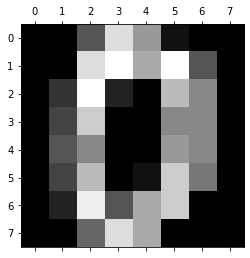

In [3]:
%matplotlib inline

print(digits.data.shape)

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


In [28]:
dtrain = xgboost.DMatrix(X_train, label=y_train)
dtest = xgboost.DMatrix(X_test, label=y_test)

param = {
    'max_depth': 5,                 # the maximum depth of each tree
    'eta': 0.3,                     # the training step for each iteration
    'silent': 1,                    # logging mode - quiet
    'objective': 'multi:softmax',   # multiclass classification using the softmax objective
    'num_class': 10                 # the number of classes that exist in this datset
}  
num_round = 500  # the number of training iterations





In [29]:
bstmodel = xgboost.train(param, dtrain, num_round)

#Save as human readable model
bstmodel.dump_model('dump.raw.txt')

In [30]:
preds = bstmodel.predict(dtest)

In [31]:
preds.shape

(360,)

In [32]:
preds

array([6., 9., 3., 7., 2., 1., 5., 2., 5., 2., 1., 9., 4., 0., 4., 2., 3.,
       7., 8., 8., 4., 3., 9., 7., 5., 6., 3., 5., 6., 3., 4., 9., 1., 4.,
       4., 6., 9., 4., 7., 6., 6., 9., 1., 3., 6., 1., 3., 0., 6., 5., 5.,
       1., 9., 5., 6., 0., 9., 0., 0., 1., 0., 4., 5., 2., 4., 5., 7., 0.,
       7., 5., 9., 5., 5., 4., 7., 0., 1., 5., 5., 9., 9., 0., 2., 3., 8.,
       0., 6., 4., 4., 9., 1., 2., 8., 3., 5., 2., 9., 4., 4., 4., 4., 3.,
       5., 3., 1., 3., 5., 9., 4., 2., 7., 7., 4., 4., 1., 9., 2., 7., 8.,
       7., 2., 6., 9., 4., 0., 7., 2., 7., 5., 8., 7., 5., 7., 9., 0., 6.,
       6., 4., 2., 8., 0., 9., 4., 6., 9., 9., 6., 9., 0., 5., 5., 6., 6.,
       0., 6., 4., 3., 9., 3., 7., 7., 2., 9., 0., 4., 5., 3., 6., 5., 8.,
       9., 8., 4., 2., 1., 3., 7., 7., 2., 2., 3., 9., 8., 0., 3., 2., 2.,
       5., 6., 9., 9., 4., 1., 5., 4., 2., 3., 6., 4., 8., 5., 9., 5., 7.,
       8., 9., 4., 8., 1., 5., 4., 4., 9., 6., 1., 8., 6., 0., 4., 5., 2.,
       7., 4., 6., 4., 5.

In [33]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, preds)

print('Accuracy: %f' % acc)

Accuracy: 0.972222


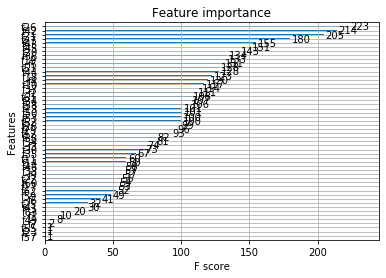

In [36]:
#Plotting tree does not work yet
#xgboost.plot_tree(bstmodel, num_trees=2)

xgboost.plot_importance(bstmodel)

In [ ]:
#5 => 0.938889
#50 => 0.966667
#500 => 0.972222
#5000 => 0.972222
# Accuracy does not improve when having more than 500 training iterations



In [ ]:
#let's try grid search
#https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7
#Todo adaptation
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)